<a href="https://colab.research.google.com/github/KoJl9lH-59rus/TMO_LAB_LYGAEV/blob/main/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Для лабораторной работы по визуализации взят набор данных "Glioma Grading Clinical and Mutation Features".

Набор был создан с целью анализа глиомы. Глиомы являются наиболее распространенными первичными опухолями головного мозга. Они могут быть классифицированы как LGG (глиома низкой степени злокачественности) или GBM (глиобластома мультиформная) в зависимости от гистологических/визуализационных критериев. Клинические и молекулярные/мутационные факторы также очень важны для процесса классификации. Молекулярные тесты являются дорогостоящими для точной диагностики пациентов с глиомой. В этом наборе данных рассматриваются наиболее часто мутирующие 20 генов и 3 клинических признака из проектов глиомы мозга TCGA-LGG и TCGA-GBM. Задача прогнозирования заключается в том, чтобы определить, является ли пациент LGG или GBM с заданными клиническими и молекулярными/мутационными признаками. Основная цель заключается в том, чтобы найти оптимальный подмножество генов мутаций и клинических признаков для процесса классификации глиомы, чтобы улучшить производительность и сократить расходы.

# Загрузка данных из github

In [6]:
url = "https://raw.githubusercontent.com/KoJl9lH-59rus/TMO_LAB_LYGAEV/refs/heads/main/%D0%9A%D0%A21/content/TCGA_InfoWithGrade.csv"
train = pd.read_csv(url)
train['Age_at_diagnosis'] = train['Age_at_diagnosis'].round(0)

In [7]:
train.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,39.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,33.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,32.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0



1. **Grade:** Степень злокачественности глиомы
2. **Gender:** Пол (0 = "мужской"; 1 = "женский")
3. **Age_at_diagnosis:** Возраст на момент постановки диагноза
4. **Race:** Раса (0 = «белый»; 1 = «черный или афроамериканец»; 2 = «азиат»; 3 = «американский индеец или коренной житель Аляски»)

Далее идут вещества взятые на анализ у больных (20 генов), где 0 = нет мутации; 1 = есть мутации
5. Изоцитратдегидрогеназа 1
6. Опухолевый белок p53
7. Ремоделер хроматина
8. Гомолог фосфатазы и тензина
9. Рецептор эпидермального фактора роста
10. Транскрипционный репрессор capicua
11. Муцин 16, связанный с клеточной поверхностью
12. Фосфатидилинозитол-4,5-бисфосфат 3-киназы каталитическая субъединица альфа
13. Нейрофибромин 1
14. Регуляторная субъединица 1 фосфоинозитид-3-киназы
15. Белок связывания дальнего элемента выше по течению 1
16. Транскрипционный корепрессор RB 1
17. Рецептор notch 1
18. Корепрессор BCL6
19. CUB и Sushi множественные домены 3
20. SWI/SNF-связанный, связанный с матриксом, зависимый от актина регулятор хроматина, подсемейство a, член 4
21. Субъединица 2A ионотропного рецептора глутамата типа NMDA
22. Изоцитратдегидрогеназа 2
23. FAT атипичный кадгерин
24. Рецептор тромбоцитарного фактора роста альфа
---



In [ ]:
train.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.936830,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,...,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.708398,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,...,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,63.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Можно сделать вывод, что в наборе данных пациентов с низкой степенью злокачественности глиомы больше, средний возраст диагностирования болезни - 51 год, где минимальный 14, а максимальный 89.

Нечисловых данных и пропусков в наборе нет.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1



---



# Визуальные представления данных

<Axes: xlabel='Grade', ylabel='count'>

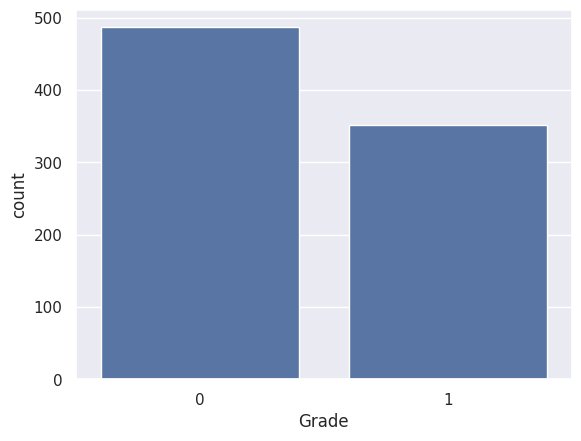

In [ ]:
sns.countplot(x=train['Grade'])

***Количество пациентов с тяжелой и легкой формой рака.***

**0 - легкая форма, 1 - тяжелая форма**

Большая часть больных в датасете имеет менее тяжелую форму рака.

<Axes: xlabel='Gender', ylabel='count'>

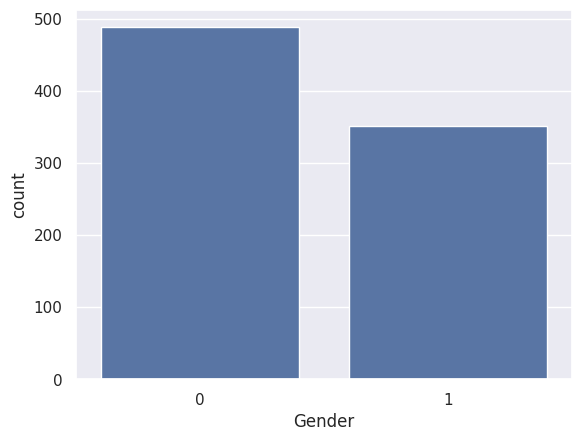

In [ ]:
sns.countplot(x=train['Gender'])

***Количество пациентов мужчин и женщин.***

**0 - Мужчины 1 - женщины**

Большая часть пациентов в датасете - мужчины.

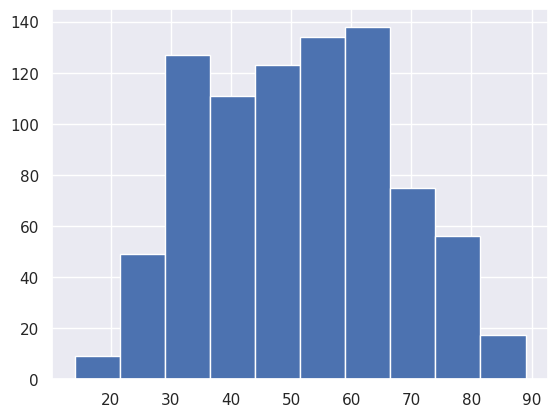

In [16]:
train.Age_at_diagnosis.hist();

***Распределение пациентов по возрастам диагностирования глиомы.***

Можно сделать вывод, что риск рака резко увеличивается после 30 лет, так как наблюдается резкий рост количества пациентов этого возраста.

<Axes: xlabel='Race', ylabel='count'>

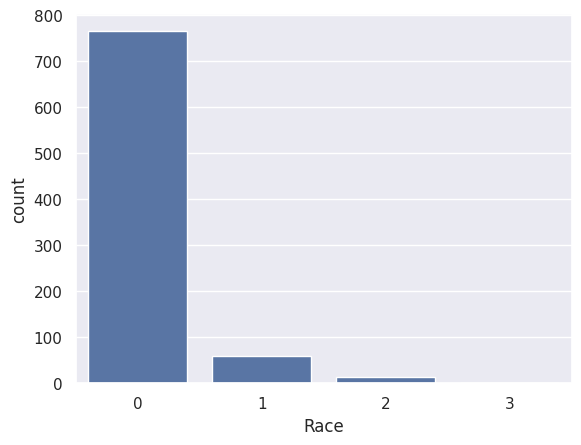

In [ ]:
sns.countplot(x=train['Race'])

---

***Распределение пациентов по расам.***

**Раса 0 - белый 1 - черный или афроамериканец 2 - азиат 3 - американский индеец или коренной житель Аляски**

Большинство пациентов в датасете - белые.

# Отношения мутировавших генов к нормальным

**Здесь 0 - легкая форма рака 1 - тяжелая форма рака.**

<Axes: xlabel='IDH1', ylabel='count'>

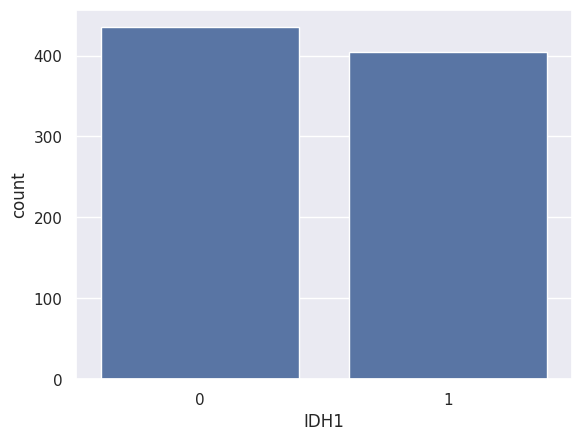

In [ ]:
sns.countplot(x=train['IDH1'])

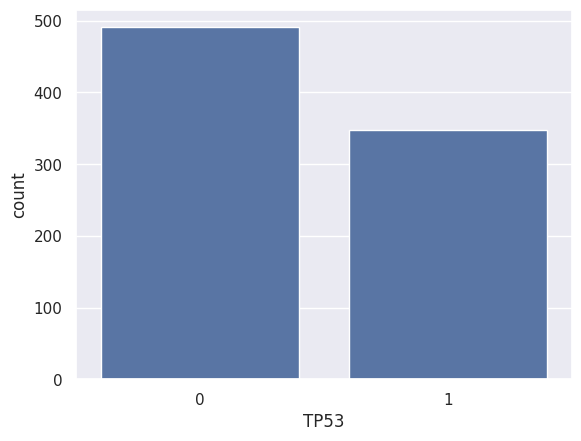

In [ ]:
sns.countplot(x=train["TP53"]);

<Axes: xlabel='ATRX', ylabel='count'>

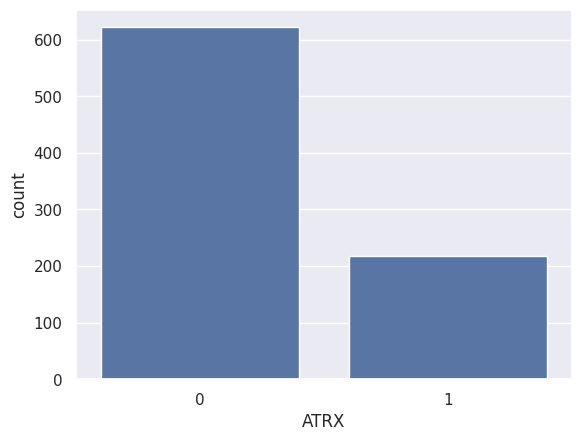

In [ ]:
sns.countplot(x=train["ATRX"])

<Axes: xlabel='PTEN', ylabel='count'>

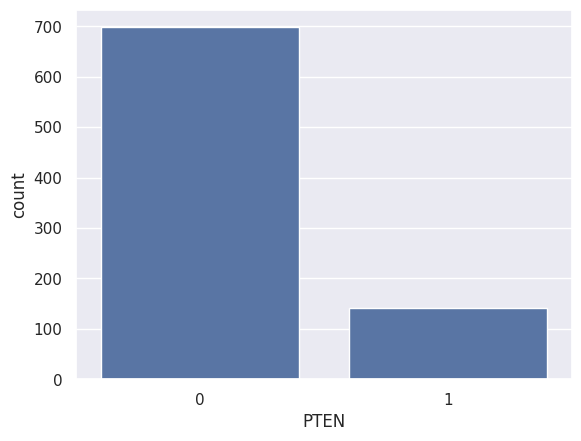

In [ ]:
sns.countplot(x=train["PTEN"])

<Axes: xlabel='CIC', ylabel='count'>

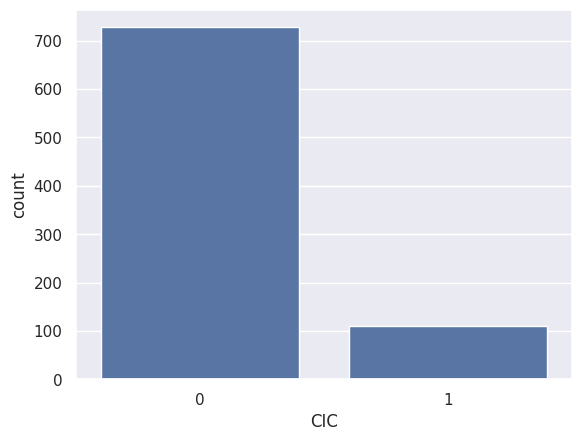

In [ ]:
sns.countplot(x=train["CIC"])

<Axes: xlabel='MUC16', ylabel='count'>

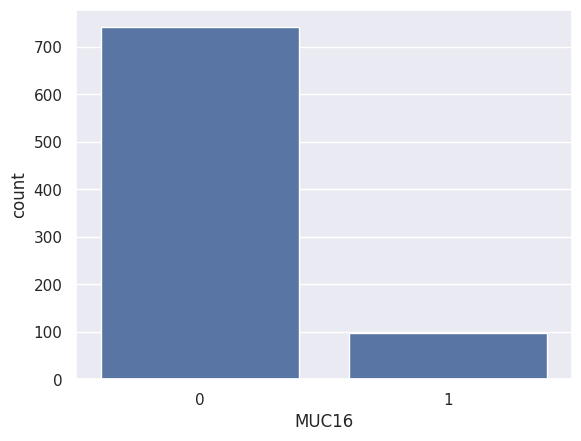

In [ ]:
sns.countplot(x=train["MUC16"])

<Axes: xlabel='PIK3CA', ylabel='count'>

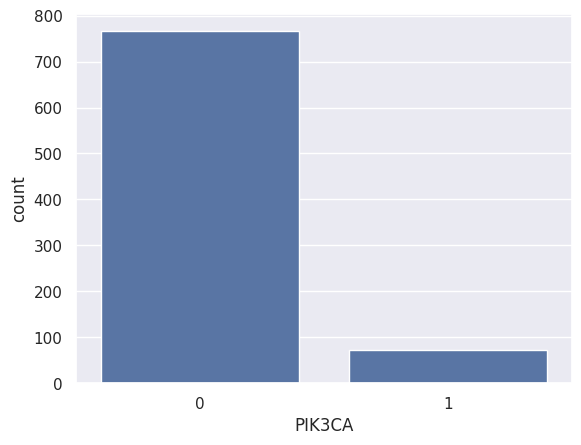

In [ ]:
sns.countplot(x=train["PIK3CA"])

<Axes: xlabel='NF1', ylabel='count'>

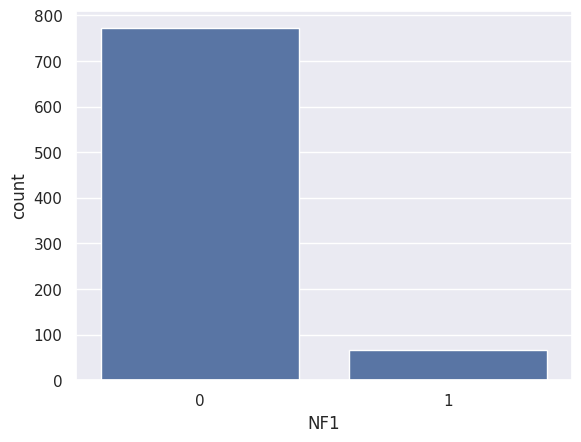

In [ ]:
sns.countplot(x=train["NF1"])

<Axes: xlabel='PIK3R1', ylabel='count'>

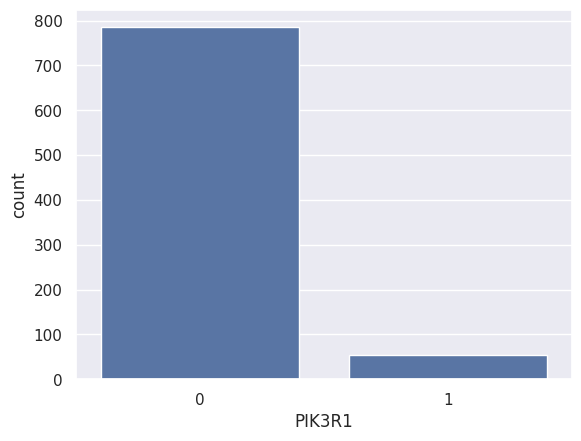

In [ ]:
sns.countplot(x=train["PIK3R1"])

<Axes: xlabel='PIK3R1', ylabel='count'>

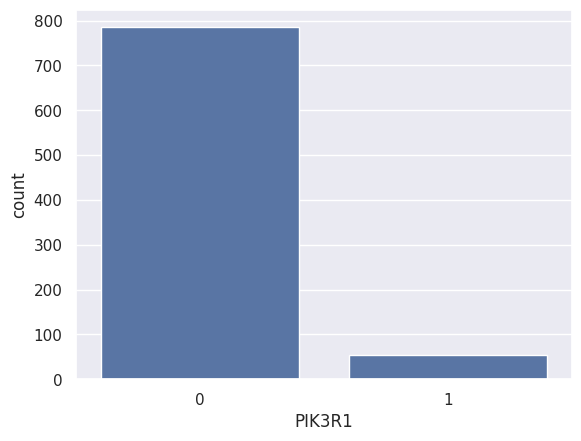

In [ ]:
sns.countplot(x=train["PIK3R1"])

<Axes: xlabel='FUBP1', ylabel='count'>

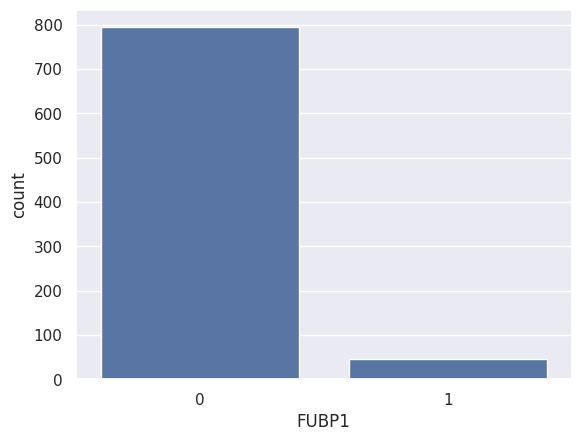

In [ ]:
sns.countplot(x=train["FUBP1"])

<Axes: xlabel='RB1', ylabel='count'>

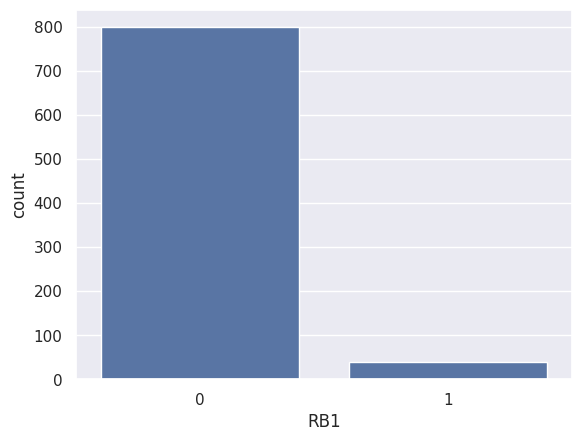

In [ ]:
sns.countplot(x=train["RB1"])

<Axes: xlabel='NOTCH1', ylabel='count'>

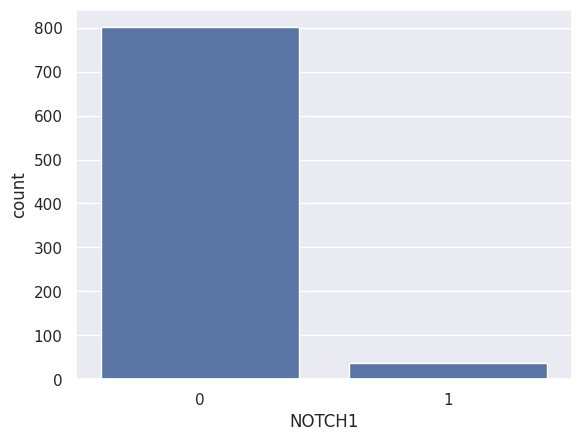

In [ ]:
sns.countplot(x=train["NOTCH1"])

<Axes: xlabel='BCOR', ylabel='count'>

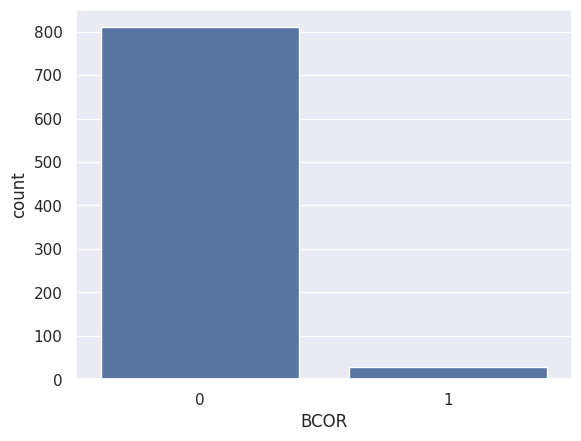

In [ ]:
sns.countplot(x=train["BCOR"])

<Axes: xlabel='CSMD3', ylabel='count'>

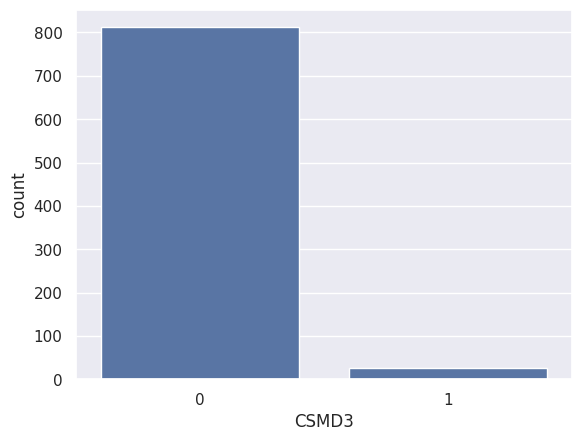

In [ ]:
sns.countplot(x=train["CSMD3"])

<Axes: xlabel='SMARCA4', ylabel='count'>

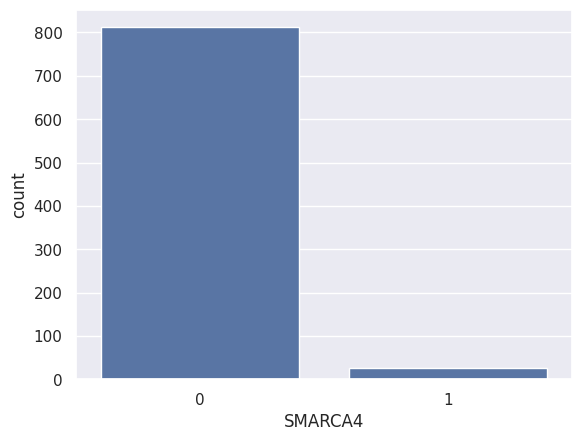

In [ ]:
sns.countplot(x=train["SMARCA4"])

<Axes: xlabel='GRIN2A', ylabel='count'>

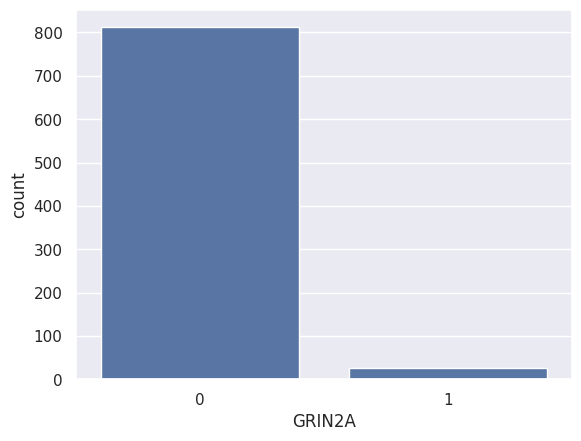

In [ ]:
sns.countplot(x=train["GRIN2A"])

<Axes: xlabel='IDH2', ylabel='count'>

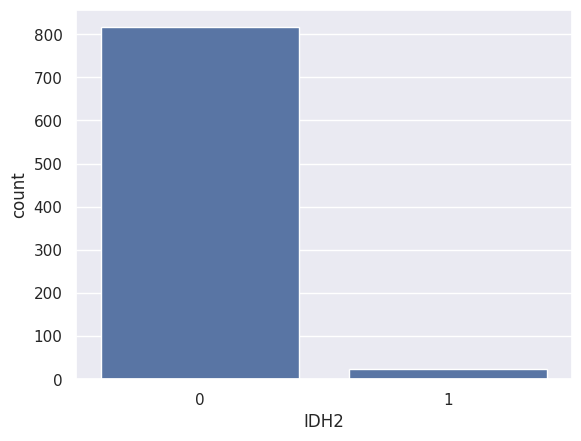

In [ ]:
sns.countplot(x=train["IDH2"])

<Axes: xlabel='FAT4', ylabel='count'>

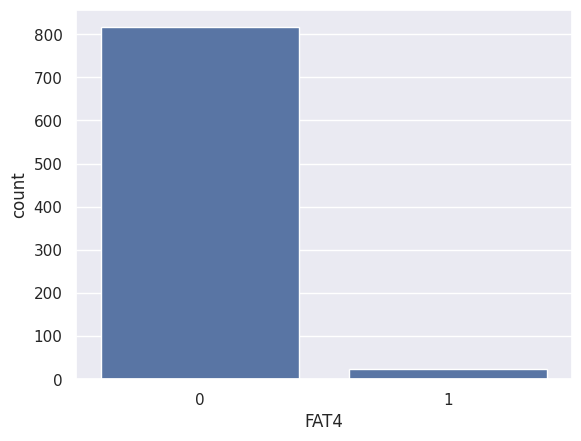

In [ ]:
sns.countplot(x=train["FAT4"])

<Axes: xlabel='PDGFRA', ylabel='count'>

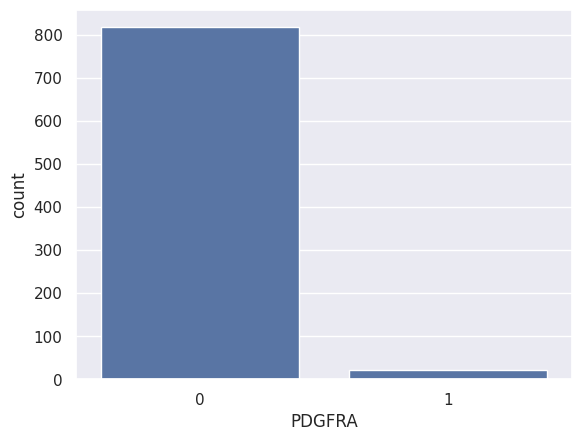

In [ ]:
sns.countplot(x=train["PDGFRA"])

Количество мутаций большинства генов менее 100, самыми значительными могут быть первые пять.

---

# Влияние генов на сложность рака

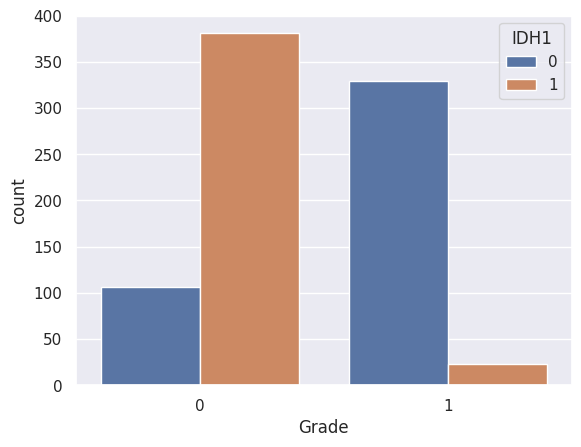

In [ ]:
sns.countplot(data=train, x='Grade', hue='IDH1');

***Количество пациентов у которых пристуствует или отсутствует мутация гена IDH1***

**0 - легкая форма, 1 - тяжелая форма**

Отсутстие мутации у этого гена может провоцировать тяжелую форму рака

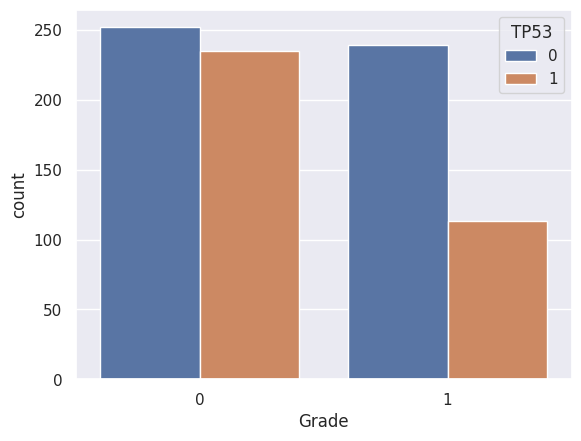

In [ ]:
sns.countplot(data=train, x='Grade', hue='TP53');

***Количество пациентов у которых пристуствует или отсутствует мутация гена TP53***

**0 - легкая форма, 1 - тяжелая форма**

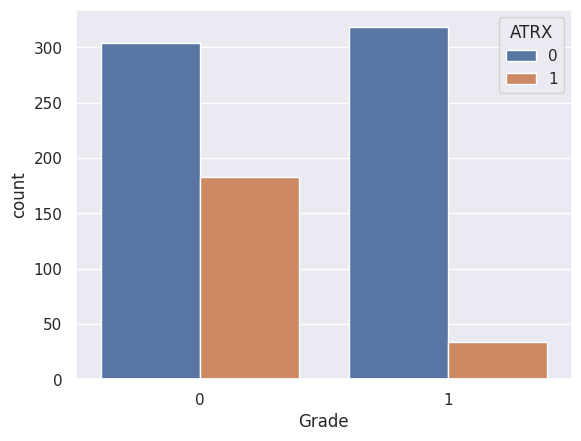

In [ ]:
sns.countplot(data=train, x='Grade', hue='ATRX');

***Количество пациентов у которых пристуствует или отсутствует мутация гена ATRX1***

**0 - легкая форма, 1 - тяжелая форма**

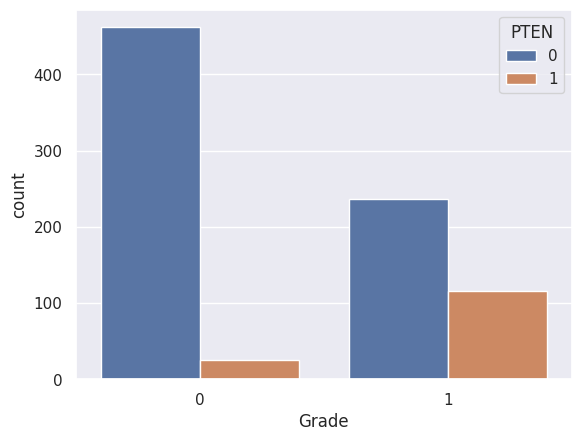

In [ ]:
sns.countplot(data=train, x='Grade', hue='PTEN');

***Количество пациентов у которых пристуствует или отсутствует мутация гена PTEN***

**0 - легкая форма, 1 - тяжелая форма**

Ген, возможно оказывающий влияние на злокачественность опухоли, причем в худшую сторону, где примерно треть тяжелых случаев содержит его мутацию

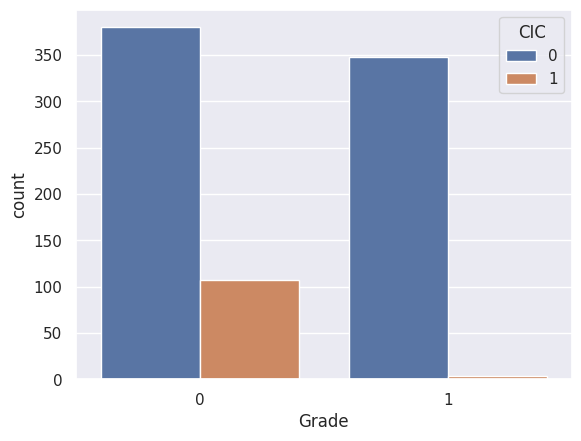

In [ ]:
sns.countplot(data=train, x='Grade', hue='CIC');

***Количество пациентов у которых пристуствует или отсутствует мутация гена PTEN***

**0 - легкая форма, 1 - тяжелая форма**

---

# Сравнение клинических признаков

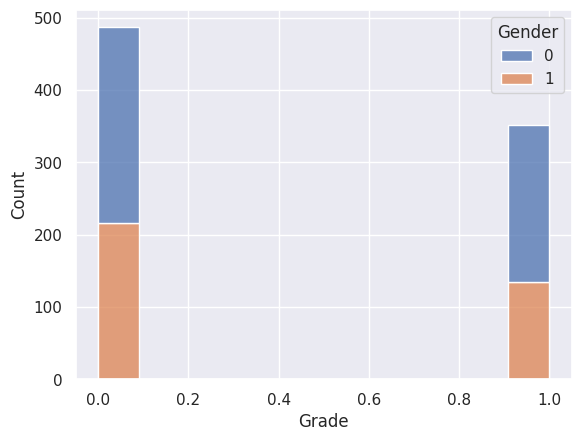

In [13]:
sns.histplot(train, x="Grade", hue="Gender", multiple="stack");

***Соотношения полов среди пациентов имеющих заболевание.***

**0 - Мужчины 1 - женщины**

Учитывая разницу в количестве пациентов разных полов, можно сказать, что соотношение среди форм рака одинаково.

<Axes: xlabel='Gender', ylabel='count'>

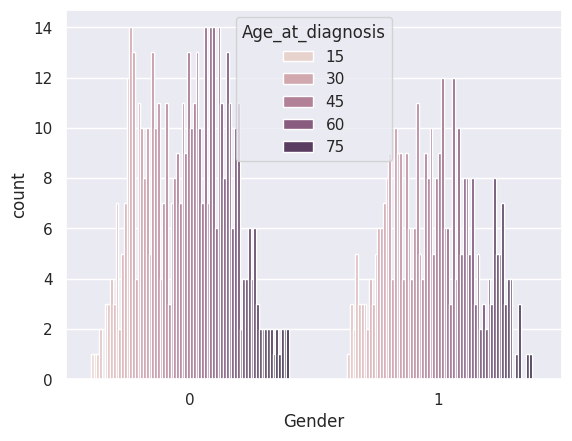

In [ ]:
sns.countplot(data = train, x='Gender', hue='Age_at_diagnosis')

***Распределение пациентов мужчин и пациентов женщин по возратам диагностирования рака.***

**0 - Мужчины 1 - женщины**

Можно заметить что диагноз глиомы ставят больше молодым или старым мужчинам, когда как у женщин график чуть более плавный. (может сказаться разница в количестве пациентов мужчин и женщин тут ничего).

Помимо прочего видно, что очень молодых и старых меньшенство.

<Axes: xlabel='Race', ylabel='Grade'>

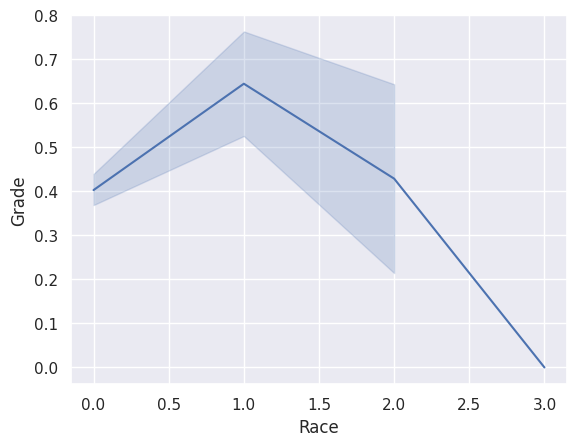

In [10]:
sns.lineplot(data=train, x='Race', y='Grade')

***Соотношение больных тяжелой степенью глиомы к легкой разных рас.***

**По X: 0 - белый 1 - черный или афроамериканец 2 - азиат 3 - американский индеец или коренной житель Аляски**

**По Y: 0 - легкая форма рака 1 - тяжелая форма рака**

Можно заметить, что среди черных пациентов более половины имеют тяжелую форму опухоли, когда все остальные около половины или меньше. (пациентов-коренных жителей аляски и индейцев всего 2 человека)

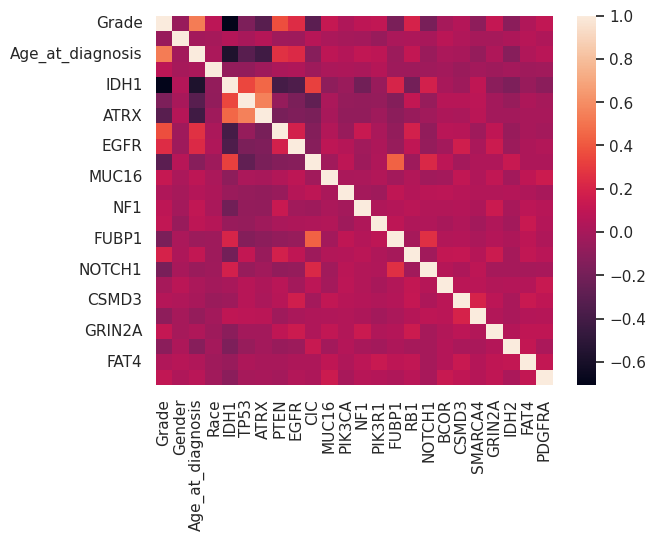

In [ ]:
sns.heatmap(train.corr());